In [1]:
import sys
import os
sys.path.append(os.path.abspath("../scripts"))  # Go up one level into scripts/

from data_cleaning import load_data, clean_data, count_invalid_dates

# Load and clean
df = load_data("../Data/AAPL_historical_data.csv")

In [2]:
print("Invalid date count before cleaning:", count_invalid_dates(df))
df = clean_data(df)
print("Data loaded and cleaned. Shape:", df.shape)
df.head()

Invalid date count before cleaning: 0
Data loaded and cleaned. Shape: (10998, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
from indicators import add_technical_indicators
df = add_technical_indicators(df)
# Preview
df[['Date', 'Close', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail(10)

,Date,Close,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist
10988,2024-07-17,228.880005,220.862000,63.587172,8.463671,8.310411,0.153260
10989,2024-07-18,224.179993,221.356500,56.919750,7.612783,8.170885,-0.558103
10990,2024-07-19,224.309998,222.088000,57.053890,6.869748,7.910658,-1.040910
10991,2024-07-22,223.960007,222.911501,56.543451,6.181391,7.564804,-1.383414
10992,2024-07-23,225.009995,223.755000,57.764268,5.655396,7.182923,-1.527527
10993,2024-07-24,218.539993,224.228500,48.687742,4.662717,6.678882,-2.016164
10994,2024-07-25,217.490005,224.440500,47.386437,3.748082,6.092722,-2.344640
10995,2024-07-26,217.960007,224.633500,48.055700,3.026267,5.479431,-2.453164
10996,2024-07-29,218.240005,225.014500,48.476184,2.448591,4.873263,-2.424672
10997,2024-07-30,218.800003,225.117001,49.359115,2.012764,4.301163,-2.288399


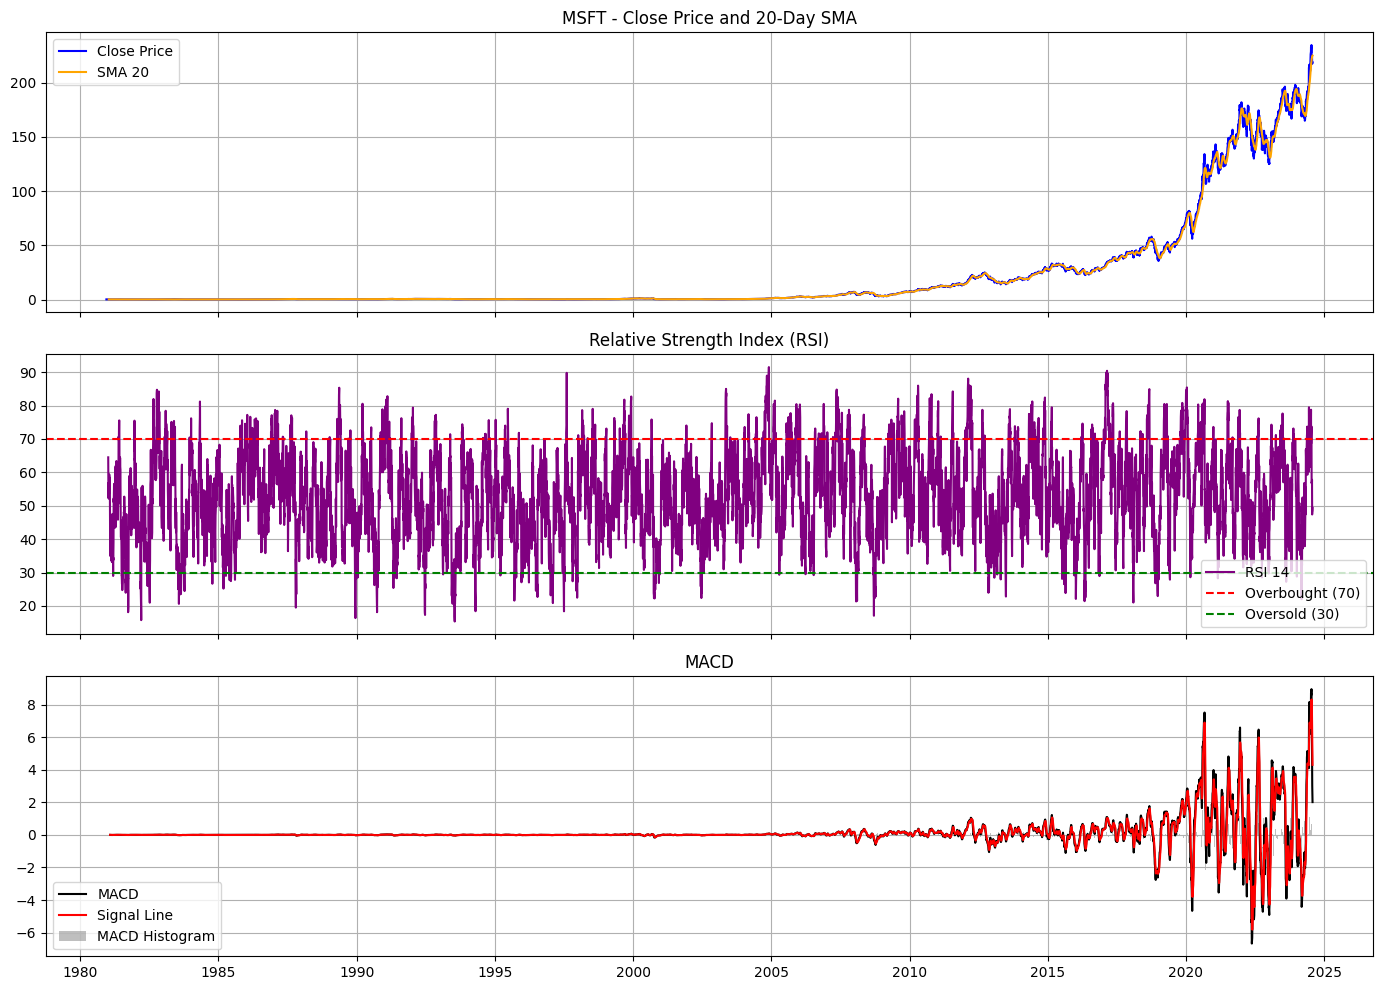

In [4]:
from visuals import plot_indicators
plot_indicators(df, ticker_name="MSFT")

📊 Technical Indicator Summary (Last 10 Days)
Column	Description
Date	Trading date for each record.
Close	Closing price of the stock.
SMA_20	20-day Simple Moving Average — smooths the price trend.
RSI_14	14-day Relative Strength Index — momentum signal:
🔹 RSI > 70 → Overbought
🔻 RSI < 30 → Oversold
MACD	Measures momentum by comparing short- and long-term EMAs.
MACD_Signal	EMA of the MACD — used to generate buy/sell signals.
MACD_Hist	Difference between MACD and Signal line:
🔹 Positive → Bullish momentum
🔻 Negative → Bearish momentum

🔍 Interpretation
RSI:
RSI peaked at 63.58 on 2024-07-17 (strong momentum), then declined to around 49.35 by 2024-07-30.

It's not overbought (not above 70), but still above 30, indicating neutral to weak bullish momentum.

MACD:
MACD and Signal lines are declining steadily from:

MACD: 8.46 → 2.01

Signal: 8.31 → 4.30

This suggests waning bullish momentum and a potential trend reversal.

MACD Histogram:
MACD Histogram values turn negative from 2024-07-18, hitting -2.45 and still negative at the end.

A falling histogram indicates that the MACD line is moving further below the signal line → bearish signal.

SMA vs Close:
The Close price is below the SMA_20 throughout the 10-day period:

E.g., on 2024-07-30: Close = 218.80, SMA_20 = 225.12

This shows the price is trading below the average, confirming bearish trend pressure.

✅ Key Takeaways:
⚠️ Bearish signals emerging:

Declining RSI

Negative MACD histogram

Close price below SMA

No clear buy signal yet — you may want to wait until:

RSI rebounds toward 60–70

MACD crosses back above the Signal line

Close price rises above SMA_20